# Import Libraries

In [18]:
import csv
from bs4 import BeautifulSoup
import requests

# Base URL

In [19]:
baseurl = 'https://www.noon.com/'

# Opening a CSV file for storing data

In [20]:
csvfile = open('data_.csv','w',encoding='utf-8',newline='')
csv_writer = csv.writer(csvfile)
csv_writer.writerow(['Date','Model Number','Brand','Name','Currency','Store Name','Partner Rating','Positive Rating','price','Sale price','FBN','Links'])

108

# Storing every link of the product in list

In [21]:
productLinks = []
for x in range(1,65):
    URL =f'https://www.noon.com/egypt-en/sports-and-outdoors/exercise-and-fitness/yoga-16328/?limit=50&page={x}&sort%5Bby%5D=popularity&sort%5Bdir%5D=desc'
    r = requests.get(URL)
    soup = BeautifulSoup(r.content,'lxml')
    productList = soup.find_all('span',class_='sc-5e739f1b-0 gEERDr wrapper productContainer')
    for item in productList:
        for link in item.find_all('a',href=True):
            productLinks.append(baseurl+link['href'])
print(len(productLinks))

3200


# Extracting every product details to csv

In [22]:
for link in productLinks:
    r = requests.get(link)
    soup = BeautifulSoup(r.content,'lxml')

    Date = '18-10-2022'
    try:
        brand = soup.find('div',class_='sc-c44e3e2d-11 jbKJDi').text.strip()
    except:
        brand = 'null'
    name = soup.find('h1',class_='sc-c44e3e2d-12 kODUYj').text.strip()
    currency = (soup.find('div',class_="priceNow").text.strip())[0:3]
    price = (soup.find('div',class_="priceNow").text.strip())[4:10]
    try:
        priceWas = (soup.find('div',class_='priceWas').text.strip())[4:10]
    except:
        priceWas = price
    storeName = soup.find('span',class_='allOffers').text.strip()
    try:
        try:
            p_rating = soup.find('div',class_='sc-d711b2ac-4 bQMRwI').text.strip()
        except:
            p_rating = soup.find('div',class_='sc-d711b2ac-4 bQMNCl').text.strip()
    except:
        try:
            p_rating = soup.find('div',class_='sc-d711b2ac-4 bkSvgF').text.strip()
        except:
            p_rating = "null"
    try:
        pos_ratings = (soup.find('div',class_='sc-d711b2ac-5 hKZAQq').text.strip())[0:3]
    except:
        pos_ratings = 'null'
    try:
        m_num = (soup.find('div',class_='modelNumber').text.strip())[15:31]
    except:
        m_num = 'null'
    try:
        FBN = soup.find('img',class_='sc-b51db3f-1 bGljQY')['alt']
    except:
        FBN = 'null'
    csv_line = [Date,m_num,brand,name,currency,storeName,p_rating,pos_ratings,priceWas,price,FBN,link]
    csv_writer.writerow(csv_line)

csvfile.close()

# Analysing the extracted Data

In [23]:
csvfile = open('data_.csv','r')
csv_reader = csv.reader(csvfile)

# For Costly and Cheapest products in Data

In [24]:
costly = []
cheapest = []

s = 0
l = 10000
for line in csv_reader:
    if line[9]!='Sale price':
        try:
            value = float(line[9])
            if value > s:
                s = value
            elif value < l:
                l = value
        except:
            pass
        if s == value:
            costly.append(line[3])
        elif l == value:
            cheapest.append(line[3])

# Costly Products

In [25]:
print(set(costly))

{'Yoga Mat 17mm'}


# Cheapest Products

In [26]:
print(set(cheapest))

{'Yoga Ball 2021 65cm', 'Exercise Mat', '18D-141 Yoga Roller Pink 30cm', 'Yoga Ball 2021 55cm'}


# Finding no.of products from each Brand and Seller

In [27]:
import matplotlib.pyplot as plt 

In [28]:
csvfile = open('data_.csv','r')
csv_reader = csv.reader(csvfile)

In [29]:
total_products = []
total_sellers = []
for line in csv_reader:
    total_products.append(line[2])
    total_sellers.append(line[5])

In [30]:
count = [[total_products.count(item),item] for item in set(total_products)]
count_2 = [[total_sellers.count(item),item] for item in set(total_sellers)]

# Number of Products from Each brand

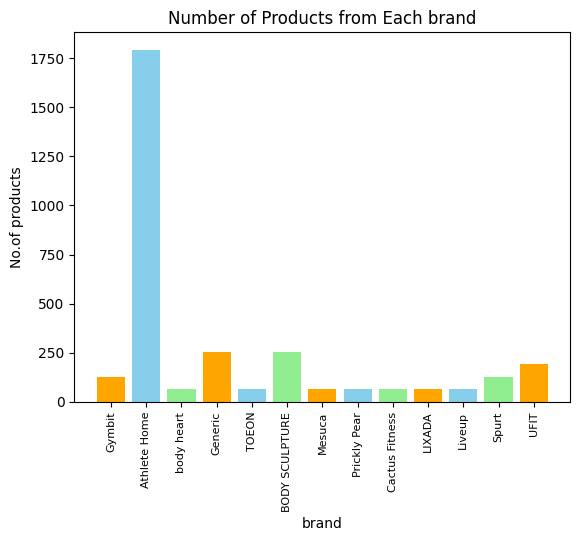

In [31]:
brand = []
c = []
for item in count:
    if item[1]!='Brand':
        brand.append(item[1])
        c.append(item[0])
color = ['orange','skyblue','lightgreen']
plt.bar(brand,c,color=color)
plt.xticks(rotation='vertical',size=8)
plt.xlabel('brand')
plt.ylabel('No.of products')
plt.title('Number of Products from Each brand')
plt.show()

# Number of Products by Each seller

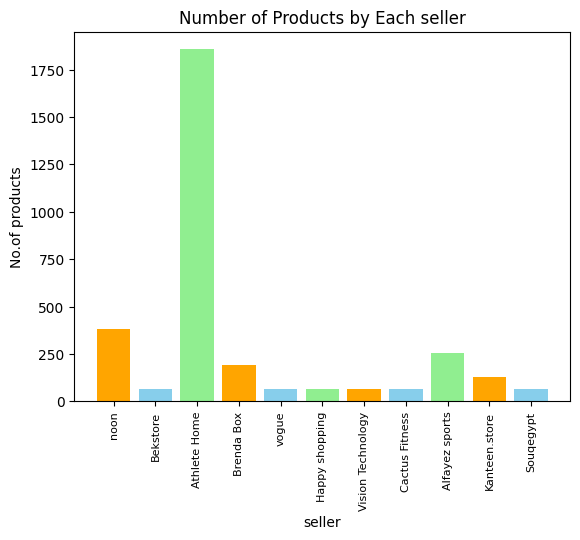

In [32]:
seller = []
t = []
for item in count_2:
    if item[1]!='Store Name':
        seller.append(item[1])
        t.append(item[0])

plt.bar(seller,t,color=color)
plt.xticks(rotation='vertical',size=8)
plt.xlabel('seller')
plt.ylabel('No.of products')
plt.title('Number of Products by Each seller')
plt.show()

# THANK YOU